In [ ]:
import os
import cv2
import random
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from PIL import Image
from scipy.ndimage import rotate
from keras import backend as K
from keras.models import Model,Sequential
from keras.layers import Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Reshape,GlobalAveragePooling2D,ZeroPadding2D,MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.layers import Bidirectional, LSTM
from keras.layers import Lambda, Activation, BatchNormalization,Add
# from keras.optimizers import Adam,SGD
from tensorflow.keras.optimizers import Adam,SGD
from keras.layers import Flatten
from keras.initializers import glorot_uniform
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

%matplotlib inline

In [ ]:
!unzip 'train.zip' -d 'train'

Archive:  train.zip
   creating: train/train/
   creating: train/train/ALEF/
  inflating: train/train/ALEF/ID0000100_p3_B11.tif  
  inflating: train/train/ALEF/ID0000100_p3_B44.tif  
  inflating: train/train/ALEF/ID0000100_p3_B69.tif  
  inflating: train/train/ALEF/ID0000100_p3_B70.tif  
  inflating: train/train/ALEF/ID0000100_p3_B85.tif  
  inflating: train/train/ALEF/ID0000101_p3_B11.tif  
  inflating: train/train/ALEF/ID0000101_p3_B44.tif  
  inflating: train/train/ALEF/ID0000101_p3_B69.tif  
  inflating: train/train/ALEF/ID0000101_p3_B70.tif  
  inflating: train/train/ALEF/ID0000101_p3_B85.tif  
  inflating: train/train/ALEF/ID0000102_p3_B11.tif  
  inflating: train/train/ALEF/ID0000102_p3_B44.tif  
  inflating: train/train/ALEF/ID0000102_p3_B69.tif  
  inflating: train/train/ALEF/ID0000102_p3_B70.tif  
  inflating: train/train/ALEF/ID0000102_p3_B85.tif  
  inflating: train/train/ALEF/ID0000103_p3_B11.tif  
  inflating: train/train/ALEF/ID0000103_p3_B44.tif  
  inflating: train/tra

In [ ]:
!unzip 'validation.zip' -d 'validation'

Archive:  validation.zip
   creating: validation/validation/
   creating: validation/validation/ALEF/
  inflating: validation/validation/ALEF/ID00001_p3_B11.tif  
  inflating: validation/validation/ALEF/ID00001_p3_B44.tif  
  inflating: validation/validation/ALEF/ID00001_p3_B69.tif  
  inflating: validation/validation/ALEF/ID00001_p3_B70.tif  
  inflating: validation/validation/ALEF/ID00001_p3_B85.tif  
  inflating: validation/validation/ALEF/ID00002_p3_B11.tif  
  inflating: validation/validation/ALEF/ID00002_p3_B44.tif  
  inflating: validation/validation/ALEF/ID00002_p3_B69.tif  
  inflating: validation/validation/ALEF/ID00002_p3_B70.tif  
  inflating: validation/validation/ALEF/ID00002_p3_B85.tif  
  inflating: validation/validation/ALEF/ID00003_p3_B11.tif  
  inflating: validation/validation/ALEF/ID00003_p3_B44.tif  
  inflating: validation/validation/ALEF/ID00003_p3_B69.tif  
  inflating: validation/validation/ALEF/ID00003_p3_B70.tif  
  inflating: validation/validation/ALEF/ID00

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
DATA_TRAIN_PATH='train/train'
DATA_VALIDATION_PATH ='validation/validation'
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

IMG_WIDTH =32
IMG_HEIGHT =32
EPOCHS_VGG=60
BATCH_SIZE_VGG=500

train_generator  = train_datagen.flow_from_directory(
        DATA_TRAIN_PATH,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE_VGG,
        class_mode='categorical')

test_generator = val_datagen.flow_from_directory(
        DATA_VALIDATION_PATH,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE_VGG,
        class_mode='categorical')

Found 37109 images belonging to 32 classes.
Found 861 images belonging to 32 classes.


In [ ]:
model_vgg = keras.Sequential()
model_vgg.add(keras.layers.InputLayer(input_shape=(32,32, 3)))
model_vgg.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Flatten())
model_vgg.add(keras.layers.Dense(units=80, activation='relu'))
model_vgg.add(keras.layers.Dense(units=80, activation='relu'))
model_vgg.add(keras.layers.Dense(32, activation='softmax'))
model_vgg.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
from keras.models import model_from_json
json_file = open('save_vgg_gpu.json', 'r')
model_json_c = json_file.read()
json_file.close()

model = model_from_json(model_json_c)
model.load_weights("vgg16_3_gpu.h5")

model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

loss = 'categorical_crossentropy'
optimizer = 'adam'
model_vgg.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
checkpoint = ModelCheckpoint("vgg16_3_gpu.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
res_vgg = model_vgg.fit_generator(train_generator,
                    steps_per_epoch=int(37109/500),
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=int(861/40),
                    callbacks=[checkpoint,early])


model_json = model_vgg.to_json()
with open("save_vgg_gpu.json", "w") as json_file:
    json_file.write(model_json)

Epoch 1/10
74/74 [==============================] - 402s 5s/step - loss: 0.0596 - accuracy: 0.9882 - val_loss: 0.5074 - val_accuracy: 0.9419

Epoch 00001: val_accuracy improved from -inf to 0.94193, saving model to vgg16_3_gpu.h5
Epoch 2/10
74/74 [==============================] - 411s 6s/step - loss: 0.0317 - accuracy: 0.9936 - val_loss: 0.3331 - val_accuracy: 0.9501

Epoch 00002: val_accuracy improved from 0.94193 to 0.95006, saving model to vgg16_3_gpu.h5
Epoch 3/10
74/74 [==============================] - 407s 5s/step - loss: 0.0451 - accuracy: 0.9903 - val_loss: 0.5896 - val_accuracy: 0.9315

Epoch 00003: val_accuracy did not improve from 0.95006
Epoch 4/10
74/74 [==============================] - 397s 5s/step - loss: 0.0506 - accuracy: 0.9882 - val_loss: 0.5229 - val_accuracy: 0.9443

Epoch 00004: val_accuracy did not improve from 0.95006
Epoch 5/10
74/74 [==============================] - 386s 5s/step - loss: 0.0407 - accuracy: 0.9918 - val_loss: 0.4115 - val_accuracy: 0.9419

E

In [ ]:
model_json = model_vgg.to_json()
with open("save_vgg_gpu.json", "w") as json_file:
    json_file.write(model_json)

[[2.6354005e-04 4.2555970e-05 3.0862928e-05 2.2546096e-04 1.9755054e-04
  1.7650377e-03 1.4642357e-04 6.0993532e-04 2.7166374e-05 1.2297336e-04
  1.1697258e-03 2.8442191e-05 3.9475497e-02 9.0164394e-05 1.1963173e-02
  4.3288423e-05 8.9183331e-01 2.0537843e-07 1.4816551e-04 1.6944989e-05
  2.5569731e-03 3.3962715e-04 3.8855406e-04 2.5731377e-05 3.2036766e-02
  4.7567673e-06 1.6145648e-02 4.1920480e-06 3.1830100e-06 2.0504936e-04
  3.9838600e-05 4.9248181e-05]]
[16]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
['ALEF', 'BE', 'CHE', 'DAL', 'EIN', 'FE', 'GAF', 'GHAF', 'GHEIN', 'HE', 'HE2', 'JIM', 'KAF', 'KHE', 'LAM', 'MIM', 'NON', 'PE', 'RE', 'SAD', 'SE3', 'SHIN', 'SIN', 'TA', 'TE', 'VAV', 'YEH', 'ZA', 'ZAD', 'ZAL', 'ZE', 'ZHE']
NON


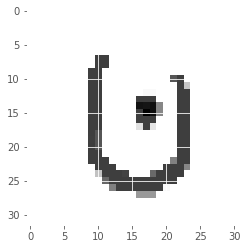

In [ ]:
image = cv2.imread("non.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (32, 32))
# image = np.expand_dims(image, axis=3)
image = np.expand_dims(image, axis=0)
# image = 255 - image
# image = image.astype(float) / 255
p = model_vgg.predict(image)
print(p)
index = np.argmax(model_vgg.predict(image), axis=-1)
print(np.argmax(model_vgg.predict(image), axis=-1))
list_dict_val = list((train_generator.class_indices.values()))
list_dict_key = list((train_generator.class_indices.keys()))
print(list_dict_val)
print(list_dict_key)
position = list_dict_val.index(index)
print(list_dict_key[position])
plt.imshow(image[0, ..., 0], cmap='gray')

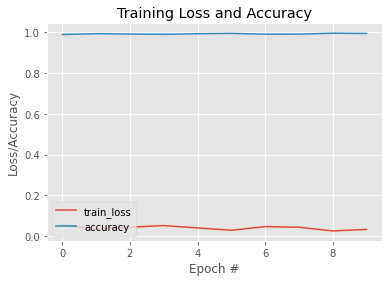

In [ ]:
N = np.arange(0, 10)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, res_vgg.history["loss"], label="train_loss")
plt.plot(N, res_vgg.history["accuracy"], label="accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
!unzip "wordsvalidation" -d "wordsvalidation"

Archive:  wordsvalidation.zip
   creating: wordsvalidation/validation/
   creating: wordsvalidation/validation/ABAN/
  inflating: wordsvalidation/validation/ABAN/ID000010_p6_B8.tif  
  inflating: wordsvalidation/validation/ABAN/ID000013_p6_B8.tif  
  inflating: wordsvalidation/validation/ABAN/ID000014_p6_B8.tif  
  inflating: wordsvalidation/validation/ABAN/ID000017_p6_B8.tif  
  inflating: wordsvalidation/validation/ABAN/ID000018_p6_B8.tif  
  inflating: wordsvalidation/validation/ABAN/ID00001_p6_B8.tif  
  inflating: wordsvalidation/validation/ABAN/ID00002_p6_B8.tif  
  inflating: wordsvalidation/validation/ABAN/ID00005_p6_B8.tif  
  inflating: wordsvalidation/validation/ABAN/ID00006_p6_B8.tif  
  inflating: wordsvalidation/validation/ABAN/ID00009_p6_B8.tif  
   creating: wordsvalidation/validation/ACOLYTE/
  inflating: wordsvalidation/validation/ACOLYTE/ID000010_p4_B35.tif  
  inflating: wordsvalidation/validation/ACOLYTE/ID00001_p4_B35.tif  
  inflating: wordsvalidation/validation/

In [ ]:
train_path = 'trainword'
validation_path = 'wordsvalidation/validation'

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(32, 32),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(validation_path,target_size=(32,32),batch_size=32,shuffle=False,class_mode='categorical')

Found 61212 images belonging to 125 classes.
Found 1254 images belonging to 125 classes.


In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(32, 32,3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    print(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(32, 32, 3))

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 2048), dtype=tf.float32, name=None), name='average_pooling2d_1/AvgPool:0', description="created by layer 'average_pooling2d_1'")


In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(125,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

In [ ]:
from keras.models import model_from_json
json_file = open('model_resnet_f.json', 'r')
model = json_file.read()
json_file.close()

model = model_from_json(model_json_c)
model.load_weights("best_resnet_model_f.h5")

In [ ]:
mc = ModelCheckpoint('best_resnet_model_f.h5',save_best_only=True,save_weights_only=False,monitor='val_accuracy', mode='auto')

In [ ]:
mc_acc = ModelCheckpoint('best_resnet_model_f.h5',save_best_only=True,save_weights_only=False, monitor='accuracy', mode='auto')

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
opt = SGD(learning_rate=1e-4, momentum=0.5)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
batch_size=500
H = model.fit_generator(train_generator,
                    steps_per_epoch=int(61212/3000),
                    epochs=50,
                    validation_data=test_generator,
                    validation_steps=int(1252/50),
                    callbacks=[mc,es])

Epoch 1/50
20/20 [==============================] - 22s 922ms/step - loss: 0.1229 - accuracy: 0.9504 - val_loss: 0.0733 - val_accuracy: 0.9775
Epoch 2/50
20/20 [==============================] - 12s 634ms/step - loss: 0.1620 - accuracy: 0.9448 - val_loss: 0.0740 - val_accuracy: 0.9762
Epoch 3/50
20/20 [==============================] - 14s 742ms/step - loss: 0.1528 - accuracy: 0.9329 - val_loss: 0.0750 - val_accuracy: 0.9762
Epoch 4/50
20/20 [==============================] - 13s 639ms/step - loss: 0.2224 - accuracy: 0.9367 - val_loss: 0.0738 - val_accuracy: 0.9762
Epoch 5/50
20/20 [==============================] - 12s 604ms/step - loss: 0.1344 - accuracy: 0.9578 - val_loss: 0.0745 - val_accuracy: 0.9775
Epoch 6/50
20/20 [==============================] - 13s 653ms/step - loss: 0.1245 - accuracy: 0.9513 - val_loss: 0.0750 - val_accuracy: 0.9775
Epoch 7/50
20/20 [==============================] - 11s 579ms/step - loss: 0.1054 - accuracy: 0.9675 - val_loss: 0.0720 - val_accuracy: 0.9800

In [ ]:
eval = model.evaluate(test_generator)

40/40 [==============================] - 34s 858ms/step - loss: 0.0538 - accuracy: 0.9841


In [ ]:
model_json = model.to_json()
with open("model_resnet_f.json","w") as json_file:
  json_file.write(model_json)

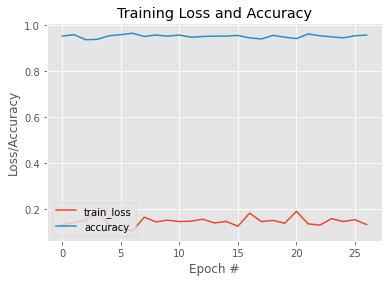

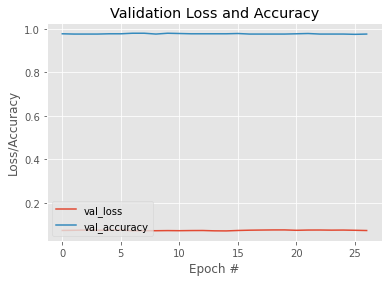

In [ ]:
N = np.arange(0, 27)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["accuracy"], label="accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()


N = np.arange(0, 27)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["val_accuracy"], label="val_accuracy")
plt.title("Validation Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
from keras.models import model_from_json
def predict_(image_path):
  json_file = open('model_resnet_f_t.json', 'r')
  model_json_c = json_file.read()
  json_file.close()

  model_c = model_from_json(model_json_c)
  model_c.load_weights("best_resnet_model_f_valacc.h5")

  opt = SGD(learning_rate=1e-4, momentum=0.9)
  model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])



  image = cv2.imread(image_path)
  image = cv2.resize(image, (32, 32))
  image = np.expand_dims(image, axis=0)
  p = model_c.predict(image)
#   print(p)
  index = np.argmax(model_c.predict(image), axis=-1)
#   print(np.argmax(model_c.predict(image), axis=-1))
  list_dict_val = list((train_generator.class_indices.values()))
  list_dict_key = list((train_generator.class_indices.keys()))
#   print(list_dict_val)
#   print(list_dict_key)
  position = list_dict_val.index(index)
print(list_dict_key[position])
  plt.imshow(image[0, ..., 0], cmap='gray')

[[0.7400656  0.93215764 0.01134585 0.86652315 0.8505563  0.92262733
  0.64528024 0.18740447 0.38896805 0.5008336  0.93502766 0.0841505
  0.44539705 0.4804925  0.26794034 0.9467434  0.84999824 0.08820561
  0.982176   0.6489265  0.8121147  0.00316638 0.95724994 0.18787967
  0.25026172 0.44773906 0.39915144 0.15157703 0.9985891  0.79154915
  0.94775975 0.5737598  0.7954613  0.90015227 0.9985613  0.02608935
  0.05670416 0.02196227 0.35691804 0.13601017 0.04717234 0.99097615
  0.2582955  0.15534861 0.00111653 0.66980916 0.12943104 0.02192517
  0.03042985 0.12721395 0.36147422 0.99928445 0.9916712  0.592961
  0.02981957 0.7109057  0.94517064 0.641499   0.02227394 0.6254585
  0.06810588 0.9841339  0.06302632 0.457399   0.8163482  0.5642269
  0.64743066 0.998949   0.05498064 0.79918754 0.45429578 0.2906657
  0.65828466 0.9660633  0.07938335 0.7194708  0.9624651  0.00430729
  0.00650436 0.0050225  0.3907599  0.5521571  0.5918421  0.08984424
  0.05932509 0.04673314 0.47745526 0.8976347  0.976087

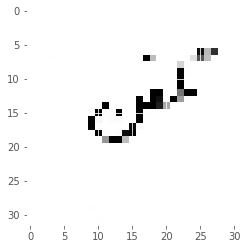

In [ ]:
res = predict_('tel.jpeg')

In [ ]:
!unzip 'mobi.zip' -d 'myhandwrittenmobi'

Archive:  mobi.zip
   creating: myhandwrittenmobi/nazi/
  inflating: myhandwrittenmobi/nazi/20210820-110709_p0.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p1.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p10.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p100.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p101.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p102.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p103.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p104.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p105.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p106.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p107.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p108.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p109.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p11.jpg  
  inflating: myhandwrittenmobi/nazi/20210820-110709_p110.jpg  
  inf

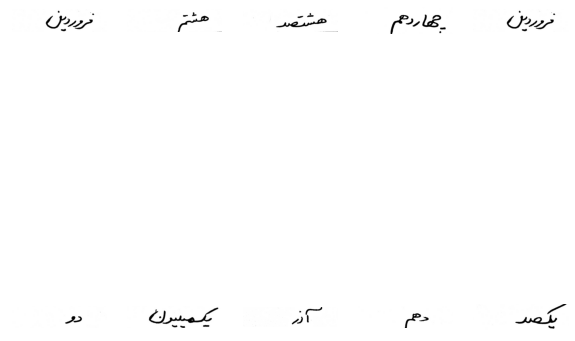

In [ ]:
plt.figure(figsize=(10,10))

random_plot = "myhandwrittenmobi/nazi"

for i in range(10):
  file = random.choice(os.listdir(random_plot))
  image_path= os.path.join(random_plot, file)
  img=mpimg.imread(image_path)
  ax=plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)

In [ ]:
json_file = open('model_resnet_f.json', 'r')
model_json_c = json_file.read()
json_file.close()

model_c = model_from_json(model_json_c)
model_c.load_weights("best_resnet_model_f.h5")

opt = SGD(learning_rate=1e-4, momentum=0.9)
model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
def predict_2(image_path):
#   image = cv2.imread(image_path)
  image = cv2.resize(image_path, (32, 32))
  image = np.expand_dims(image, axis=0)
  p = model_c.predict(image)
  index = np.argmax(model_c.predict(image), axis=-1)
#   print(np.argmax(model_c.predict(image), axis=-1))
  list_dict_val = list((train_generator.class_indices.values()))
  list_dict_key = list((train_generator.class_indices.keys()))
#   print(list_dict_val)
#   print(list_dict_key)
  position = list_dict_val.index(index)
  print(list_dict_key[position])
#   plt.imshow(image[0, ..., 0], cmap='gray')

myhandwrittenmobi/nazi/20210820-110709_p113.jpg
DEI
2


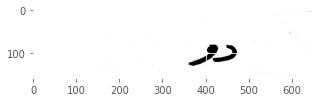

myhandwrittenmobi/nazi/20210820-110709_p75.jpg
SOLAR
3


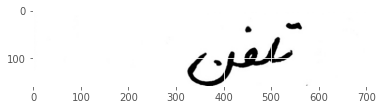

myhandwrittenmobi/nazi/20210820-110709_p34.jpg
FIFTY
4


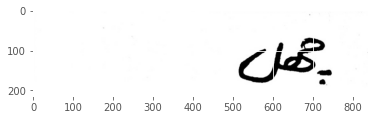

myhandwrittenmobi/nazi/20210820-110709_p32.jpg
SEVENTY
5


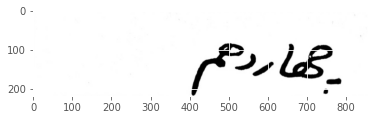

myhandwrittenmobi/nazi/20210820-110709_p19.jpg
EIGHT
6


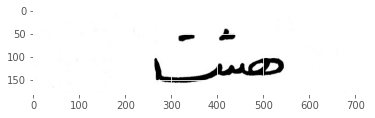

myhandwrittenmobi/nazi/20210820-110709_p122.jpg
FIFTY
7


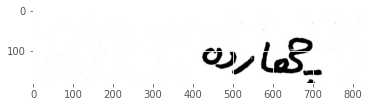

myhandwrittenmobi/nazi/20210820-110709_p50.jpg
THIRTY
8


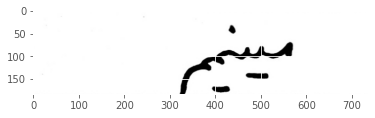

myhandwrittenmobi/nazi/20210820-110709_p64.jpg
REGARD
9


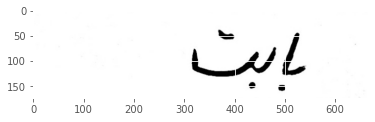

myhandwrittenmobi/nazi/20210820-110709_p63.jpg
RAMEZAN
10


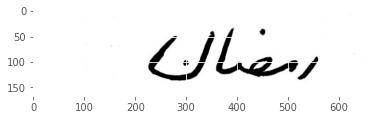

myhandwrittenmobi/nazi/20210820-110709_p91.jpg
ONE
11


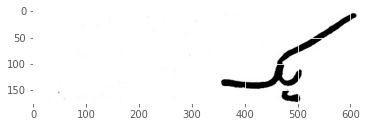

myhandwrittenmobi/nazi/20210820-110709_p115.jpg
ZEI_GHADE
12


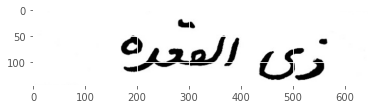

myhandwrittenmobi/nazi/20210820-110709_p38.jpg
NINTH
13


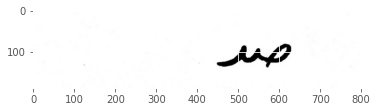

myhandwrittenmobi/nazi/20210820-110709_p46.jpg
ABAN
14


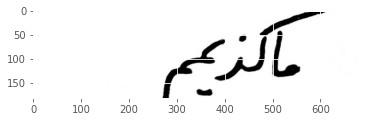

myhandwrittenmobi/nazi/20210820-110709_p119.jpg
FIVEHUNDRED
15


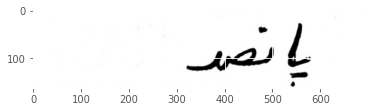

myhandwrittenmobi/nazi/20210820-110709_p26.jpg
FIVE
16


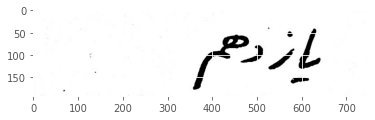

myhandwrittenmobi/nazi/20210820-110709_p12.jpg
COLLEGE
17


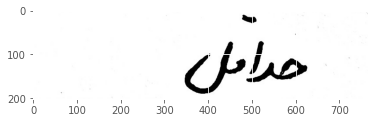

myhandwrittenmobi/nazi/20210820-110709_p92.jpg
ONEHUNDRED
18


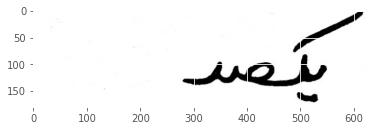

myhandwrittenmobi/nazi/20210820-110709_p16.jpg
FIVE
19


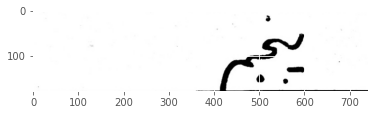

myhandwrittenmobi/nazi/20210820-110709_p61.jpg
RABIE_O_SANI
20


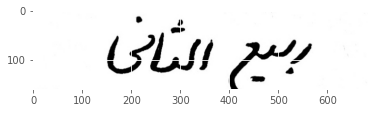

myhandwrittenmobi/nazi/20210820-110709_p100.jpg
NINEHUNDRED
21


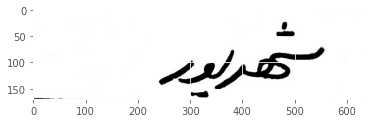

myhandwrittenmobi/nazi/20210820-110709_p51.jpg
THOUSAND
22


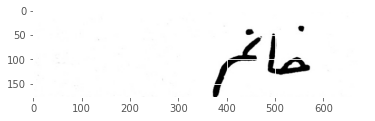

myhandwrittenmobi/nazi/20210820-110709_p121.jpg
FIVEHUNDRED
23


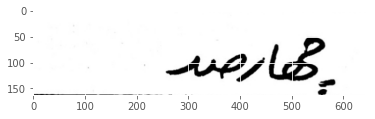

myhandwrittenmobi/nazi/20210820-110709_p62.jpg
ELEVENTH
24


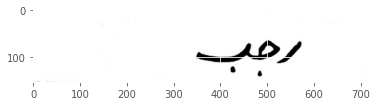

myhandwrittenmobi/nazi/20210820-110709_p55.jpg
NINTH
25


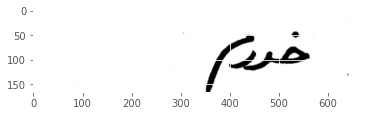

myhandwrittenmobi/nazi/20210820-110709_p72.jpg
NINTH
26


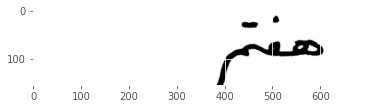

myhandwrittenmobi/nazi/20210820-110709_p107.jpg
SIX
27


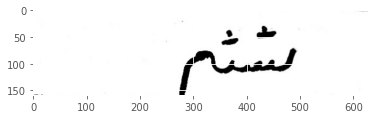

myhandwrittenmobi/nazi/20210820-110709_p123.jpg
NINETEEN
28


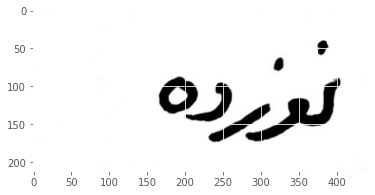

myhandwrittenmobi/nazi/20210820-110709_p18.jpg
DEI
29


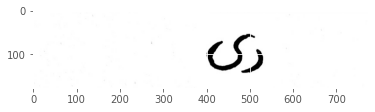

myhandwrittenmobi/nazi/20210820-110709_p73.jpg
ESFAND
30


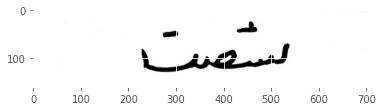

myhandwrittenmobi/nazi/20210820-110709_p5.jpg
FIVEHUNDRED
31


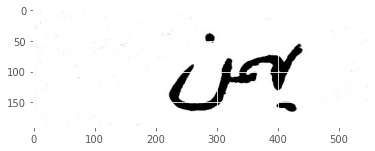

myhandwrittenmobi/nazi/20210820-110709_p11.jpg
SIXHUNDRED
32


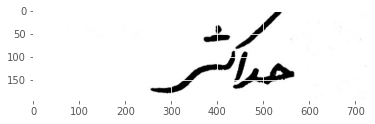

myhandwrittenmobi/nazi/20210820-110709_p52.jpg
FIFTY
33


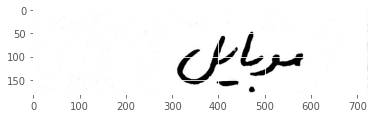

myhandwrittenmobi/nazi/20210820-110709_p10.jpg
ONE
34


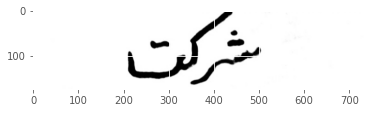

myhandwrittenmobi/nazi/20210820-110709_p56.jpg
NINTH
35


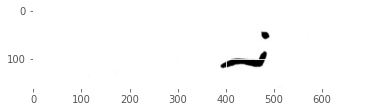

myhandwrittenmobi/nazi/20210820-110709_p4.jpg
BANK
36


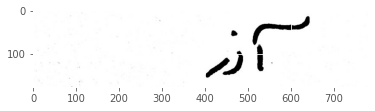

myhandwrittenmobi/nazi/20210820-110709_p53.jpg
DEI
37


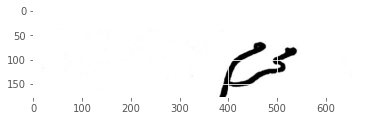

myhandwrittenmobi/nazi/20210820-110709_p87.jpg
FIFTEENTH
38


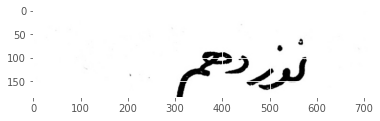

myhandwrittenmobi/nazi/20210820-110709_p44.jpg
FIFTY
39


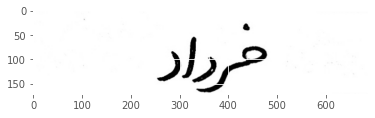

myhandwrittenmobi/nazi/20210820-110709_p70.jpg
ONETHOUSAND
40


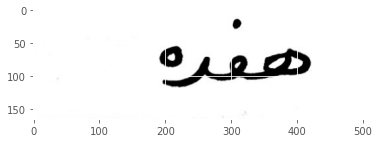

myhandwrittenmobi/nazi/20210820-110709_p2.jpg
DEI
41


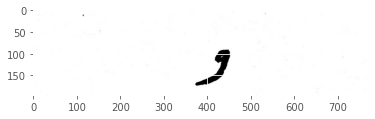

myhandwrittenmobi/nazi/20210820-110709_p96.jpg
ONETHOUSAND
42


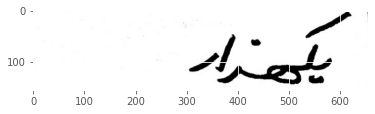

myhandwrittenmobi/nazi/20210820-110709_p8.jpg
COLLEGE
43


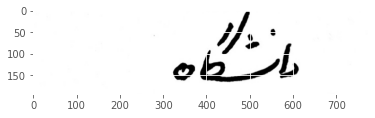

myhandwrittenmobi/nazi/20210820-110709_p30.jpg
TEL
44


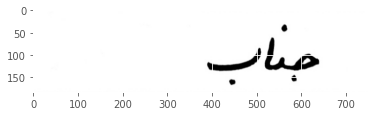

myhandwrittenmobi/nazi/20210820-110709_p81.jpg
THIRTIETH
45


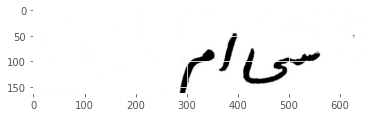

myhandwrittenmobi/nazi/20210820-110709_p117.jpg
ZERO
46


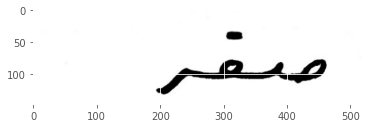

myhandwrittenmobi/nazi/20210820-110709_p48.jpg
FIFTY
47


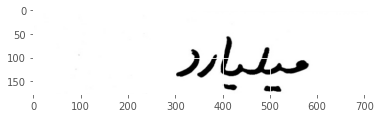

myhandwrittenmobi/nazi/20210820-110709_p99.jpg
TEL
48


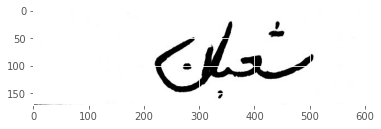

myhandwrittenmobi/nazi/20210820-110709_p13.jpg
RABIE_O_SANI
49


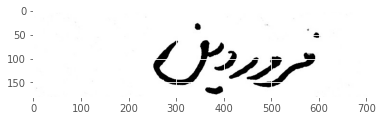

myhandwrittenmobi/nazi/20210820-110709_p33.jpg
TOMAN
50


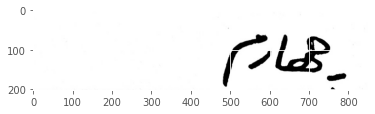

myhandwrittenmobi/nazi/20210820-110709_p24.jpg
MACHINE
51


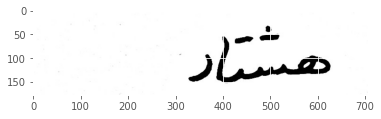

myhandwrittenmobi/nazi/20210820-110709_p85.jpg
TIR
52


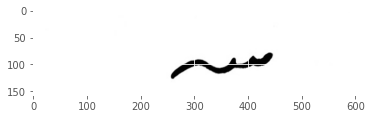

myhandwrittenmobi/nazi/20210820-110709_p43.jpg
JAMADI_OL_AVAL
53


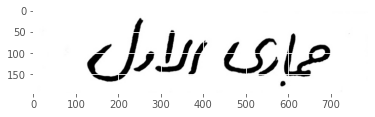

myhandwrittenmobi/nazi/20210820-110709_p9.jpg
MACHINE
54


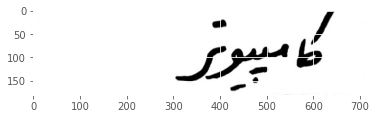

myhandwrittenmobi/nazi/20210820-110709_p69.jpg
FIVEHUNDRED
55


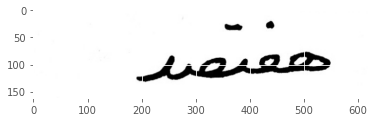

myhandwrittenmobi/nazi/20210820-110709_p58.jpg
OVERSEER
56


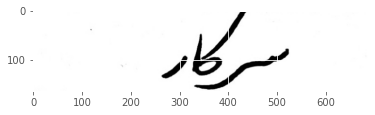

myhandwrittenmobi/nazi/20210820-110709_p22.jpg
SIX
57


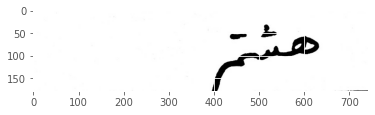

myhandwrittenmobi/nazi/20210820-110709_p20.jpg
SOLAR
58


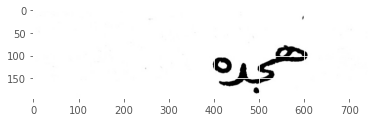

myhandwrittenmobi/nazi/20210820-110709_p79.jpg
ONEMILLIARD
59


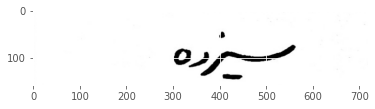

myhandwrittenmobi/nazi/20210820-110709_p45.jpg
FIFTY
60


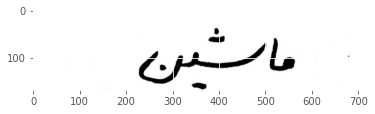

myhandwrittenmobi/nazi/20210820-110709_p7.jpg
ABAN
61


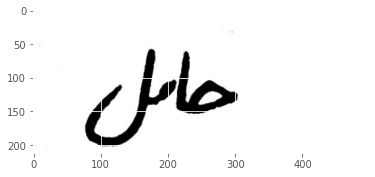

myhandwrittenmobi/nazi/20210820-110709_p6.jpg
BANK
62


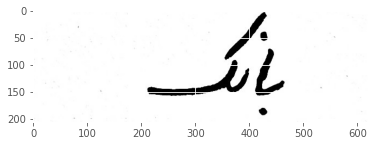

myhandwrittenmobi/nazi/20210820-110709_p104.jpg
FIVEHUNDRED
63


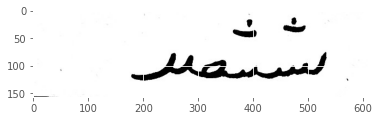

myhandwrittenmobi/nazi/20210820-110709_p83.jpg
NINETY
64


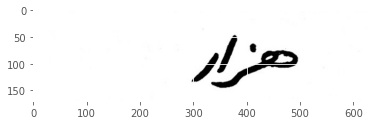

myhandwrittenmobi/nazi/20210820-110709_p105.jpg
SIXTEEN
65


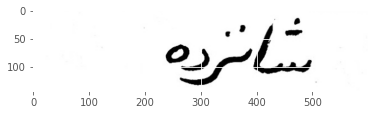

myhandwrittenmobi/nazi/20210820-110709_p27.jpg
BANK
66


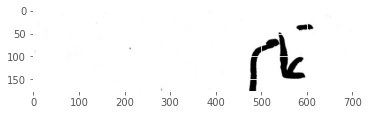

myhandwrittenmobi/nazi/20210820-110709_p71.jpg
SIX
67


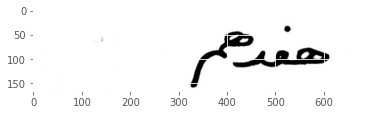

myhandwrittenmobi/nazi/20210820-110709_p112.jpg
FIVEHUNDRED
68


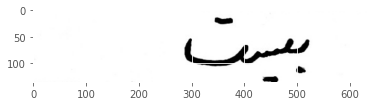

myhandwrittenmobi/nazi/20210820-110709_p116.jpg
ZEI_HAJJE
69


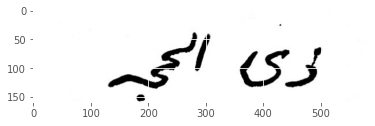

myhandwrittenmobi/nazi/20210820-110709_p59.jpg
NINETY
70


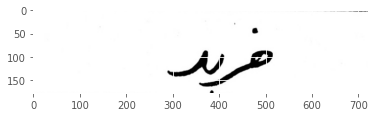

myhandwrittenmobi/nazi/20210820-110709_p28.jpg
ZERO
71


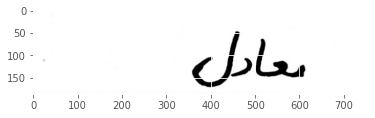

myhandwrittenmobi/nazi/20210820-110709_p88.jpg
FIVE
72


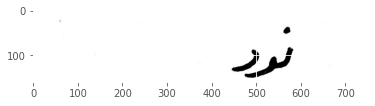

myhandwrittenmobi/nazi/20210820-110709_p78.jpg
THIRTY
73


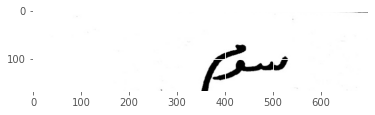

myhandwrittenmobi/nazi/20210820-110709_p94.jpg
FIVE
74


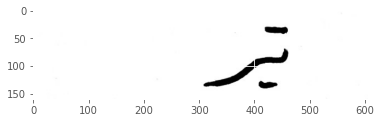

myhandwrittenmobi/nazi/20210820-110709_p118.jpg
FIVE
75


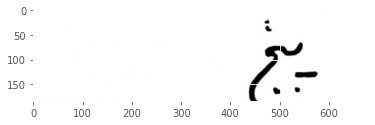

myhandwrittenmobi/nazi/20210820-110709_p1.jpg
FIFTY
76


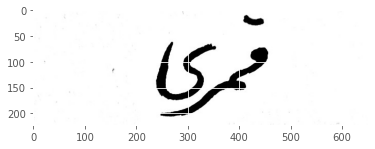

myhandwrittenmobi/nazi/20210820-110709_p111.jpg
FIVE
77


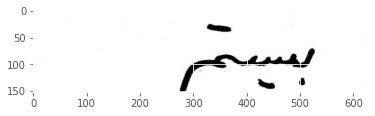

myhandwrittenmobi/nazi/20210820-110709_p40.jpg
TEL
78


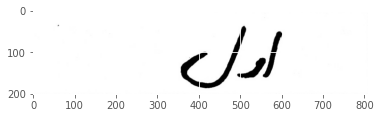

myhandwrittenmobi/nazi/20210820-110709_p17.jpg
BANK
79


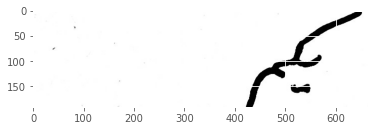

myhandwrittenmobi/nazi/20210820-110709_p110.jpg
SIXTEEN
80


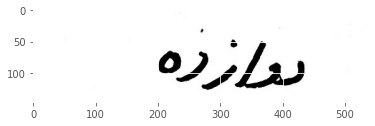

myhandwrittenmobi/nazi/20210820-110709_p101.jpg
TEL
81


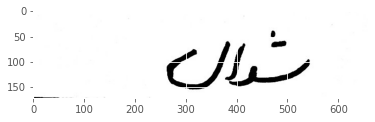

myhandwrittenmobi/nazi/20210820-110709_p29.jpg
FIVEHUNDRED
82


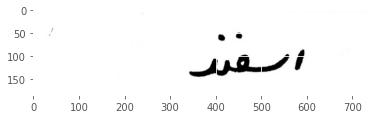

myhandwrittenmobi/nazi/20210820-110709_p21.jpg
HEJRY
83


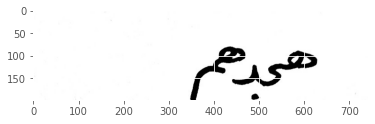

myhandwrittenmobi/nazi/20210820-110709_p76.jpg
DEI
84


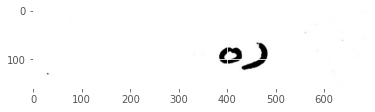

myhandwrittenmobi/nazi/20210820-110709_p95.jpg
ONEMILLION
85


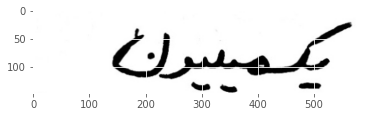

myhandwrittenmobi/nazi/20210820-110709_p60.jpg
RABIE_O_AVAL
86


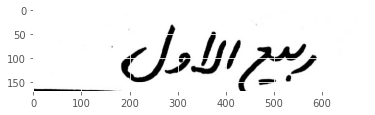

myhandwrittenmobi/nazi/20210820-110709_p74.jpg
SOLAR
87


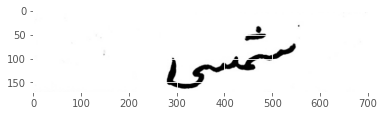

myhandwrittenmobi/nazi/20210820-110709_p25.jpg
ELEVENTH
88


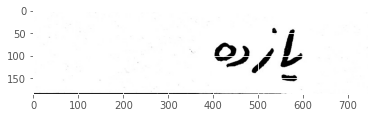

myhandwrittenmobi/nazi/20210820-110709_p37.jpg
TEL
89


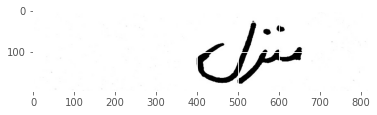

myhandwrittenmobi/nazi/20210820-110709_p54.jpg
FIVE
90


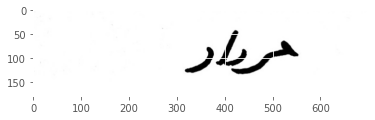

myhandwrittenmobi/nazi/20210820-110709_p90.jpg
TEL
91


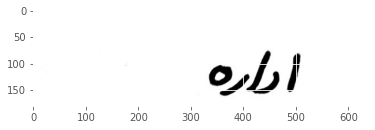

myhandwrittenmobi/nazi/20210820-110709_p124.jpg
FOURTEENTH
92


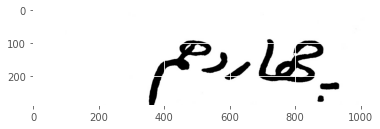

myhandwrittenmobi/nazi/20210820-110709_p35.jpg
DEI
93


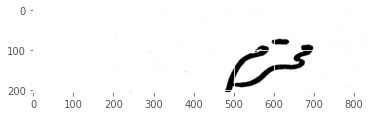

myhandwrittenmobi/nazi/20210820-110709_p41.jpg
PURCHASE
94


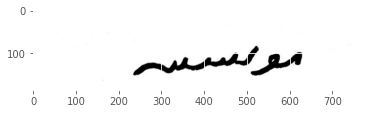

myhandwrittenmobi/nazi/20210820-110709_p57.jpg
FIVEHUNDRED
95


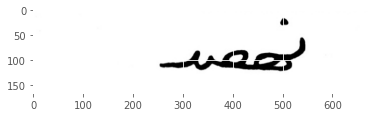

myhandwrittenmobi/nazi/20210820-110709_p23.jpg
EIGHTHUNDRED
96


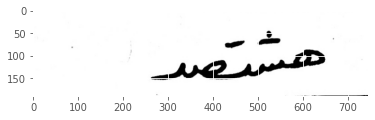

myhandwrittenmobi/nazi/20210820-110709_p3.jpg
AUTOMOBILE
97


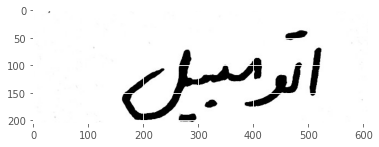

myhandwrittenmobi/nazi/20210820-110709_p68.jpg
EXCELLENCY
98


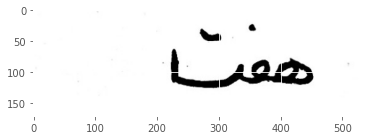

myhandwrittenmobi/nazi/20210820-110709_p66.jpg
COLLEGE
99


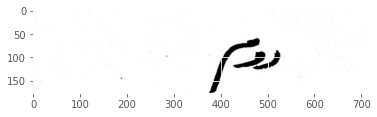

myhandwrittenmobi/nazi/20210820-110709_p103.jpg
MACHINE
100


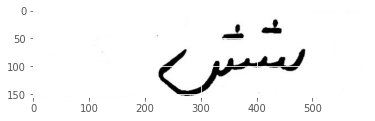

myhandwrittenmobi/nazi/20210820-110709_p114.jpg
ORDIBEHESHT
101


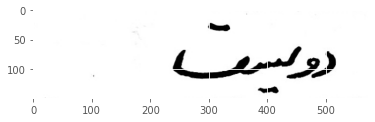

myhandwrittenmobi/nazi/20210820-110709_p47.jpg
NINTH
102


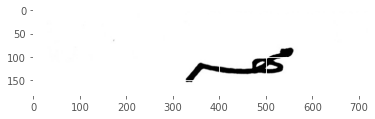

myhandwrittenmobi/nazi/20210820-110709_p89.jpg
SOLAR
103


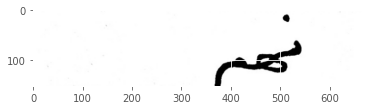

myhandwrittenmobi/nazi/20210820-110709_p0.jpg
ABAN
104


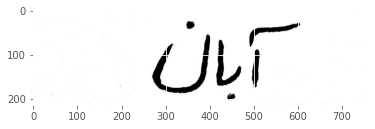

myhandwrittenmobi/nazi/20210820-110709_p80.jpg
MORDAD
105


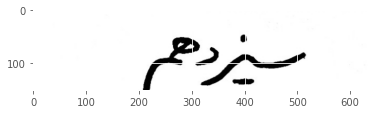

myhandwrittenmobi/nazi/20210820-110709_p82.jpg
THIRTY
106


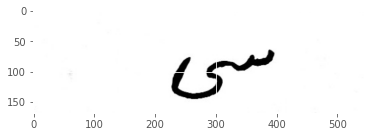

myhandwrittenmobi/nazi/20210820-110709_p42.jpg
JAMADI_O_SANI
107


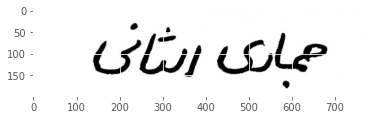

myhandwrittenmobi/nazi/20210820-110709_p31.jpg
FOURTEENTH
108


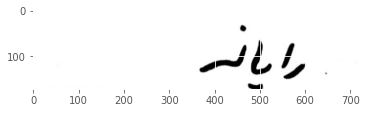

myhandwrittenmobi/nazi/20210820-110709_p108.jpg
SHABAN
109


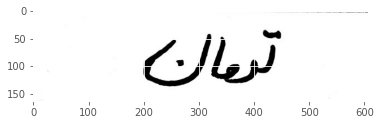

myhandwrittenmobi/nazi/20210820-110709_p106.jpg
MAX
110


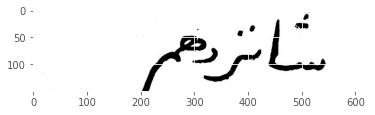

myhandwrittenmobi/nazi/20210820-110709_p86.jpg
THREEHUNDRED
111


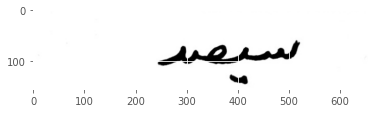

myhandwrittenmobi/nazi/20210820-110709_p49.jpg
FIFTY
112


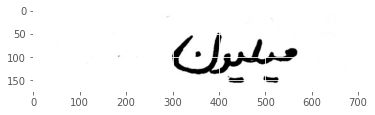

myhandwrittenmobi/nazi/20210820-110709_p65.jpg
FIFTY
113


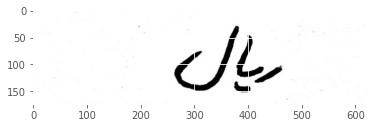

myhandwrittenmobi/nazi/20210820-110709_p102.jpg
FIVE
114


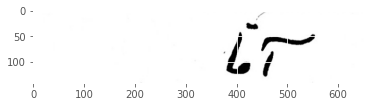

myhandwrittenmobi/nazi/20210820-110709_p109.jpg
THIRD
115


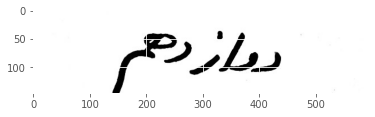

myhandwrittenmobi/nazi/20210820-110709_p67.jpg
FIFTY
116


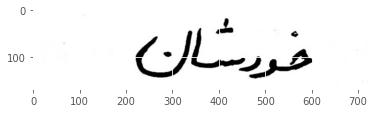

myhandwrittenmobi/nazi/20210820-110709_p98.jpg
ZERO
117


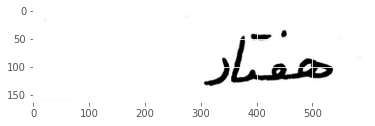

myhandwrittenmobi/nazi/20210820-110709_p36.jpg
FIVE
118


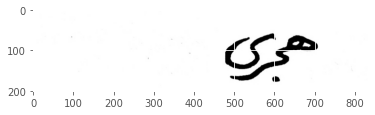

myhandwrittenmobi/nazi/20210820-110709_p14.jpg
FIFTY
119


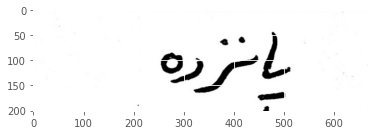

myhandwrittenmobi/nazi/20210820-110709_p97.jpg
ORDIBEHESHT
120


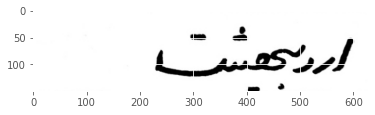

myhandwrittenmobi/nazi/20210820-110709_p15.jpg
FIFTEENTH
121


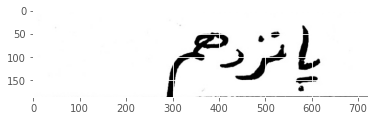

myhandwrittenmobi/nazi/20210820-110709_p77.jpg
NINE
122


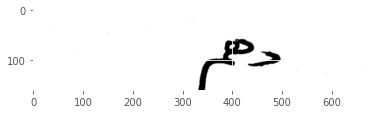

myhandwrittenmobi/nazi/20210820-110709_p120.jpg
FIVE
123


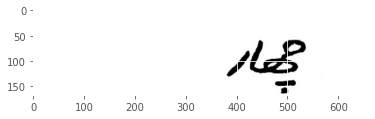

myhandwrittenmobi/nazi/20210820-110709_p93.jpg
ONEMILLIARD
124


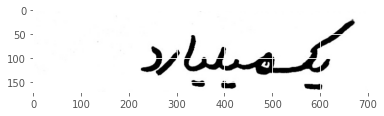

myhandwrittenmobi/nazi/20210820-110709_p84.jpg
HEJRY
125


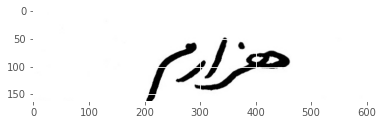

myhandwrittenmobi/nazi/20210820-110709_p39.jpg
TEL
126


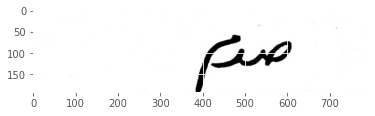

In [ ]:
plt.figure(figsize=(5,5)) 

img_folder = "myhandwrittenmobi/nazi/"
count = 1

for dir1 in os.listdir(img_folder):
    image_path= os.path.join(img_folder, dir1)
    img=mpimg.imread(image_path)
    plt.imshow(img, cmap='gray')
    print(str(img_folder)+dir1)
    predicted_label= predict_2(img)
    count +=1
    print(count)
    plt.show()